In [32]:
from SafeTransformer import SafeTransformer

In [33]:
from sklearn.datasets import load_boston

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
import pandas as pd

In [36]:
surrogate_model = GradientBoostingRegressor(n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    loss='huber')

In [37]:
data = load_boston()

In [38]:
X = data['data']

In [39]:
names = data.feature_names
X = pd.DataFrame(X, columns=names)

In [40]:
y = data['target']

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pens = np.linspace(0.01, 10, 25)
best_score = float('Inf')
best_pen = 0
X_train, X_test, y_train, y_test = train_test_split(X, y)
linear_model_standard = LinearRegression()
linear_model_standard = linear_model_standard.fit(X_train, y_train)
standard_predictions = linear_model_standard.predict(X_test)
        

In [43]:
errors = []
surrogate_model = surrogate_model.fit(X_train, y_train)
for pen in pens:
    
    safe_transformer = SafeTransformer()

    safe_transformer = safe_transformer.fit(X_train, surrogate_model, penalty = pen)

    X_train_transformed = safe_transformer.transform(X_train)

    X_test_transformed = safe_transformer.transform(X_test)

    linear_model_transformed = LinearRegression()

    linear_model_transformed = linear_model_transformed.fit(X_train_transformed, y_train)

    surrogate_predictions = linear_model_transformed.predict(X_test_transformed)
    error = mean_squared_error(y_test, surrogate_predictions)
    errors.append(error)
    print(mean_squared_error(y_test, standard_predictions), error)
    if error < best_score:
        best_score = error
        best_pen = pen

26.8047175239 53.9151285351
26.8047175239 19.9997315979
26.8047175239 18.8647308315
26.8047175239 17.5992632699
26.8047175239 17.8041895482
26.8047175239 16.8123523764
26.8047175239 16.865580723
26.8047175239 16.8935084598
26.8047175239 16.8531219825
26.8047175239 17.912564831
26.8047175239 15.0511300447
26.8047175239 15.0511300447
26.8047175239 14.9524867932
26.8047175239 14.9125162092
26.8047175239 14.9556743316
26.8047175239 14.4766576045
26.8047175239 14.4811429822
26.8047175239 14.4811429822
26.8047175239 14.233756095
26.8047175239 14.2624085496
26.8047175239 13.5496033026
26.8047175239 13.4478594857
26.8047175239 13.4478594857
26.8047175239 13.4478594857
26.8047175239 13.7265734299


In [44]:
gb_predictions = surrogate_model.predict(X_test)
print(mean_squared_error(y_test, gb_predictions))

9.12034930936


In [45]:
import matplotlib.pyplot as plt

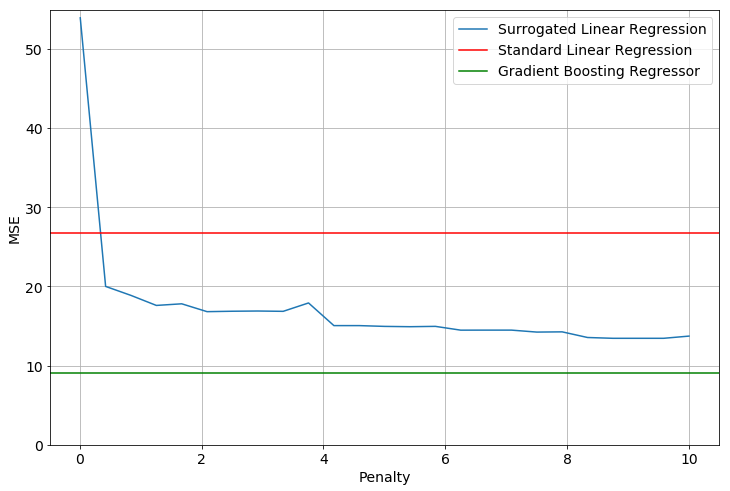

In [46]:
standard_error = mean_squared_error(y_test, standard_predictions)
xgb_error = mean_squared_error(y_test, gb_predictions)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 14})
plt.plot(pens, errors, label='Surrogated Linear Regression')
plt.xlabel('Penalty')
plt.ylabel('MSE')
plt.grid(True)
plt.axhline(standard_error, color='r', label='Standard Linear Regression')
plt.axhline(xgb_error, color='g', label='Gradient Boosting Regressor')
plt.ylim((0, max(errors)+1))
plt.legend()
plt.show()

In [47]:
best_pen

9.5837500000000002

In [48]:
X_train_transformed

,"CRIM_(16.84, 31.98)","CRIM_(31.98, 46.23)","CRIM_(46.23, 88.98)","CRIM_(88.98, +Inf)","ZN_(95.00, +Inf)","INDUS_(3.16, 27.74)","INDUS_(27.74, +Inf)","CHAS_(0.50, 1.00)","CHAS_(1.00, +Inf)","NOX_(0.60, 0.66)",...,"LSTAT_(4.48, 5.46)","LSTAT_(5.46, 7.75)","LSTAT_(7.75, 9.71)","LSTAT_(9.71, 10.04)","LSTAT_(10.04, 11.67)","LSTAT_(11.67, 14.95)","LSTAT_(14.95, 19.85)","LSTAT_(19.85, 28.85)","LSTAT_(28.85, 34.41)","LSTAT_(34.41, +Inf)"
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
